# Bank Marketing Response Classification

### 1. **About the Dataset**

#### The dataset is about "Bank Marketing" from the UCI dataset library. It is related with direct marketing campaigns of a portugese banking institution. The classification goal in this project is to predict if the client will subscribe a term deposit y. In order to classify we will be using the logistic regression algorithm here. Before we do that, let's do some exploratory data analysis on the dataset! Let's dive in!

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score


In [3]:
df = pd.read_csv("bank.csv", index_col=0, sep=";", decimal=",")
df.reset_index(inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


#### These are the variables in the datasets and brief descriptions about them: 
#### 1. Age: The age of the individual, pretty self explanatory. Numeric Data. 
#### 2. Job: The type of job - categorical data 
#### 3. Martial: The martial status of the individual - categorical data 
#### 4. Education: The highest level of education - categorical data 
#### 5. Default: Whether the individual has credit in default - categorical data 
#### 6. Housing: The individual has a housing loan or not 
#### 7. Loan: Whether the individual has a personal loan

#### The good news is that our data is clean! No null values!

#### 2. **Exploratory Data Analysis and Visualization**

#### We will first do an extensive uni variate data analysis by checking each feature once at a time. We will then proceed with bivariate analysis and try to understand the different trends and patterns. 

#### 2.1 **Univariate Analysis and Statistics**

#### We will be approaching univariate analysis in a very efficient way. Instead of writing code for each one we will use a for loop and identify the statistics for each feature using the in built describe function

In [5]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns
numerical_features

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [6]:
for feature in numerical_features:
    print(f"Statistics for {feature}:")
    print(df[feature].describe())
    print("\n")


Statistics for age:
count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64


Statistics for balance:
count     4521.000000
mean      1422.657819
std       3009.638142
min      -3313.000000
25%         69.000000
50%        444.000000
75%       1480.000000
max      71188.000000
Name: balance, dtype: float64


Statistics for day:
count    4521.000000
mean       15.915284
std         8.247667
min         1.000000
25%         9.000000
50%        16.000000
75%        21.000000
max        31.000000
Name: day, dtype: float64


Statistics for duration:
count    4521.000000
mean      263.961292
std       259.856633
min         4.000000
25%       104.000000
50%       185.000000
75%       329.000000
max      3025.000000
Name: duration, dtype: float64


Statistics for campaign:
count    4521.000000
mean        2.793630
std         3.109807
min         1.000000
2

#### 2.2: **Visualization for numerical features**

#### 2.2.1: Histogram

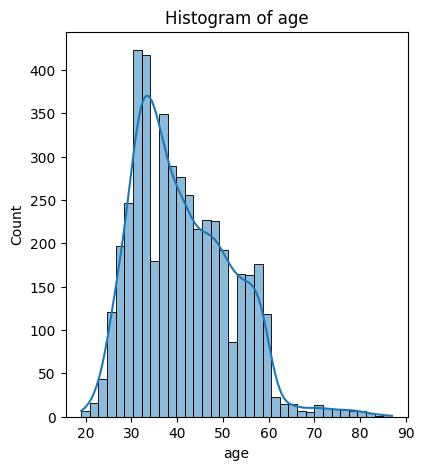

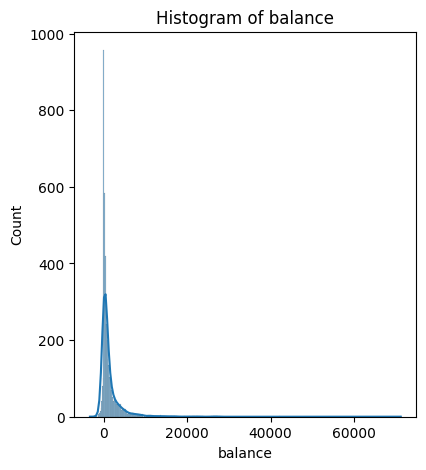

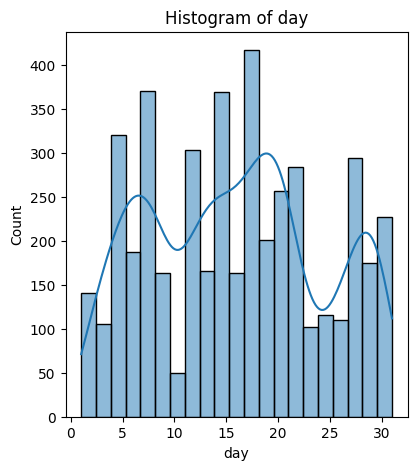

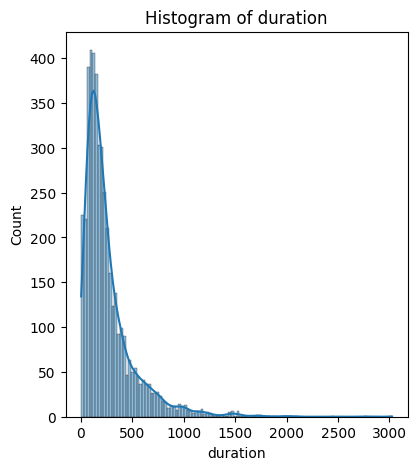

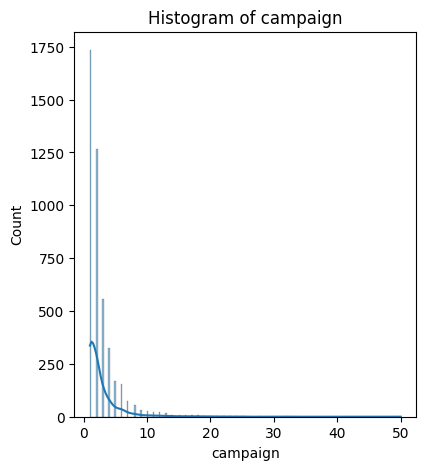

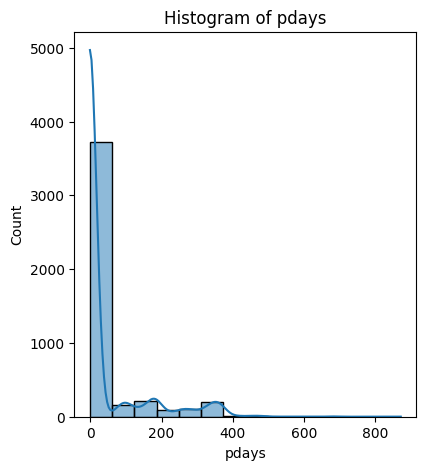

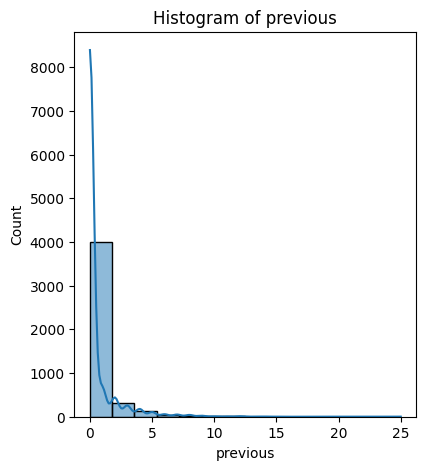

In [7]:
for feature in numerical_features:
    plt.figure(figsize=(15, 5))

   
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Histogram of {feature}')

#### 2.2.2: Boxplot

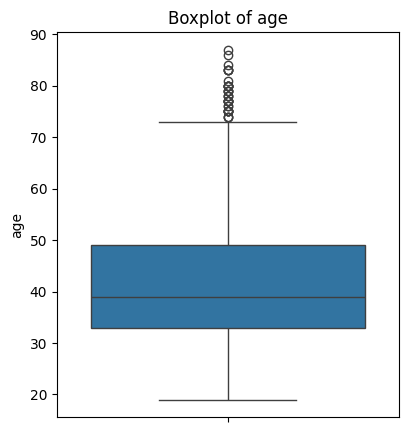

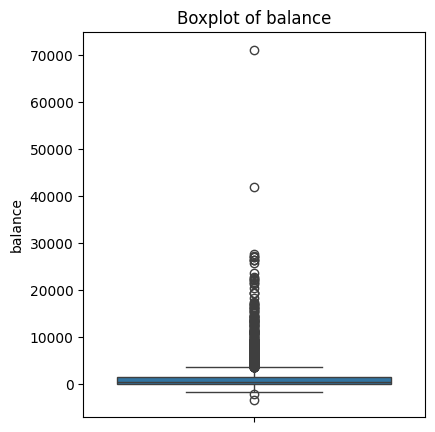

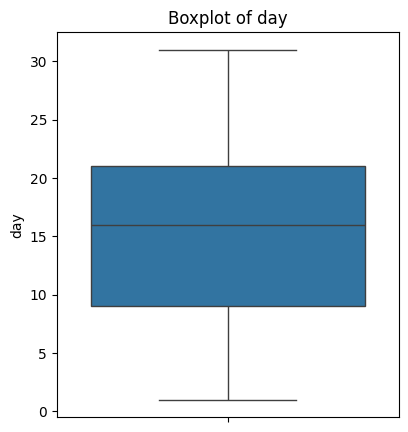

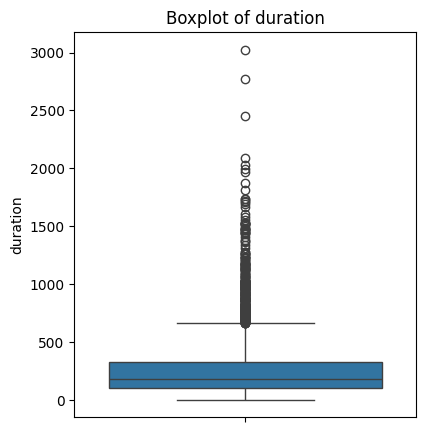

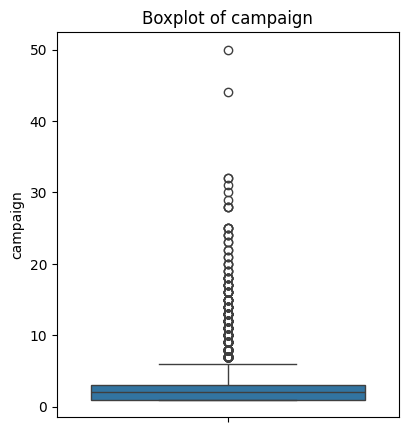

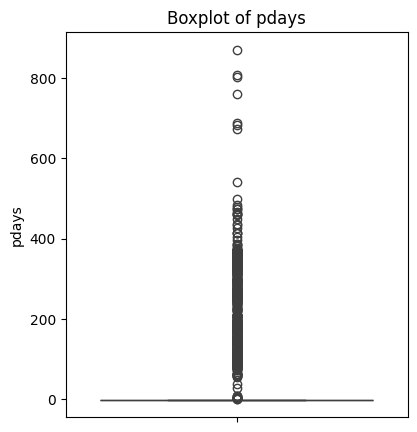

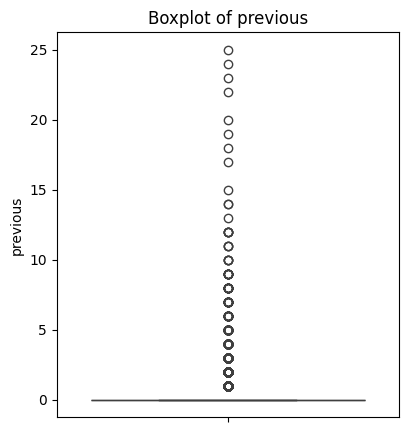

In [8]:
for feature in numerical_features:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 3, 2)
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot of {feature}')


#### 2.3: **Univariate Analysis for Categorical Features and Visualization**

In [9]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_11307/3973840125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= feature, palette='viridis')


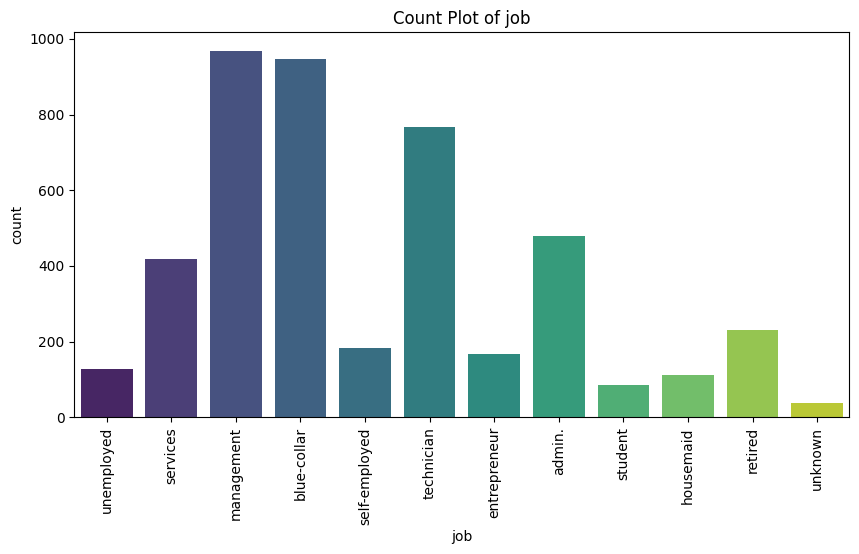

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_11307/3973840125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= feature, palette='viridis')


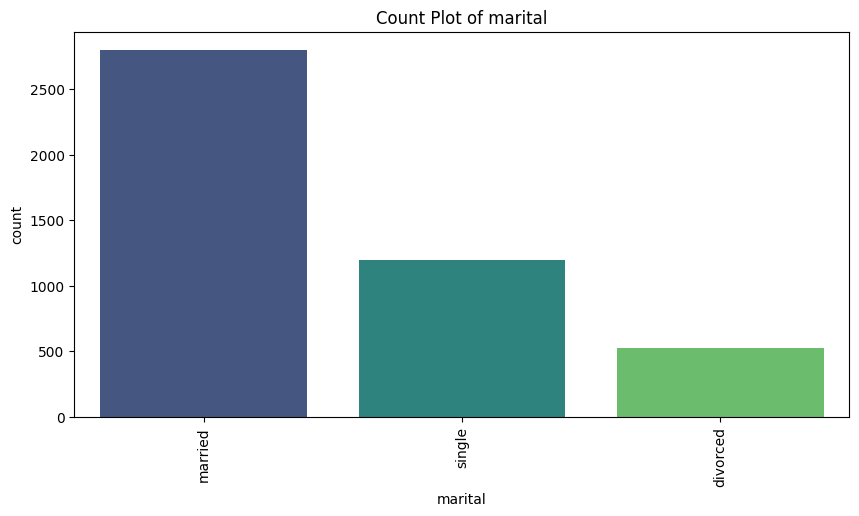

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_11307/3973840125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= feature, palette='viridis')


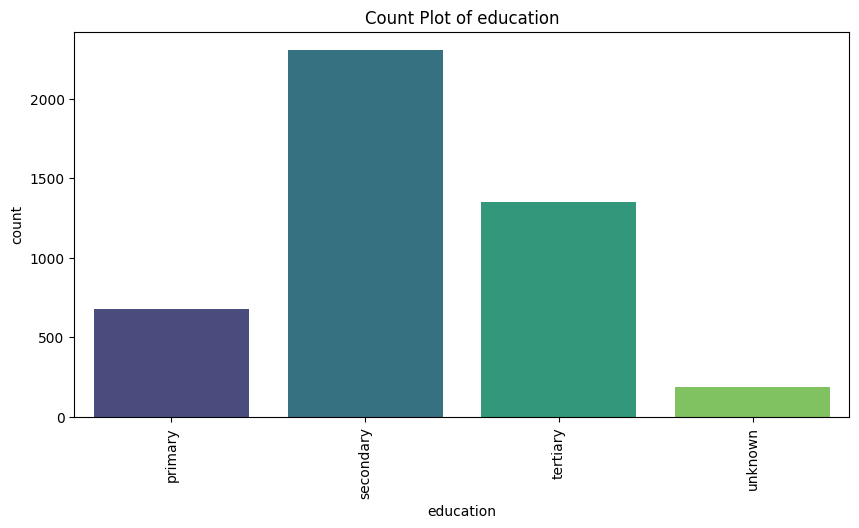

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_11307/3973840125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= feature, palette='viridis')


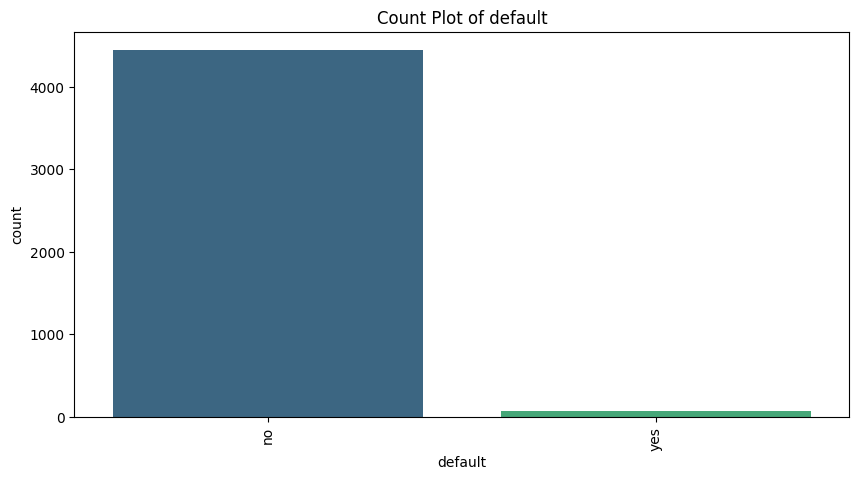

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_11307/3973840125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= feature, palette='viridis')


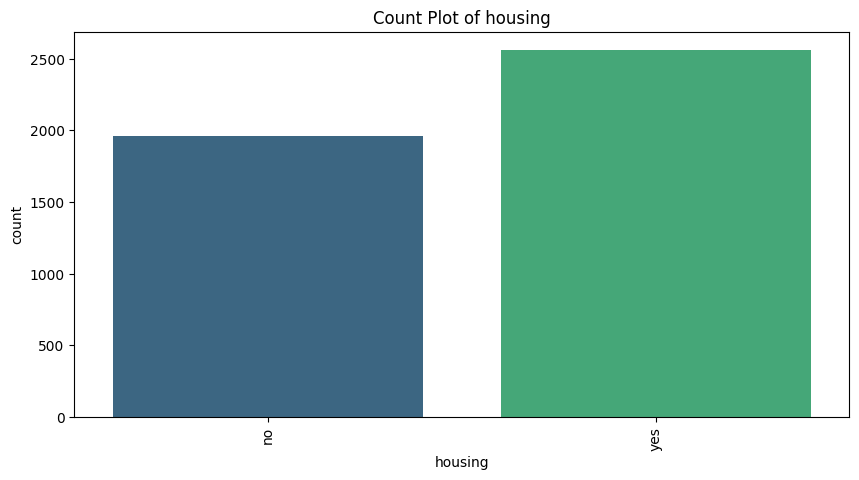

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_11307/3973840125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= feature, palette='viridis')


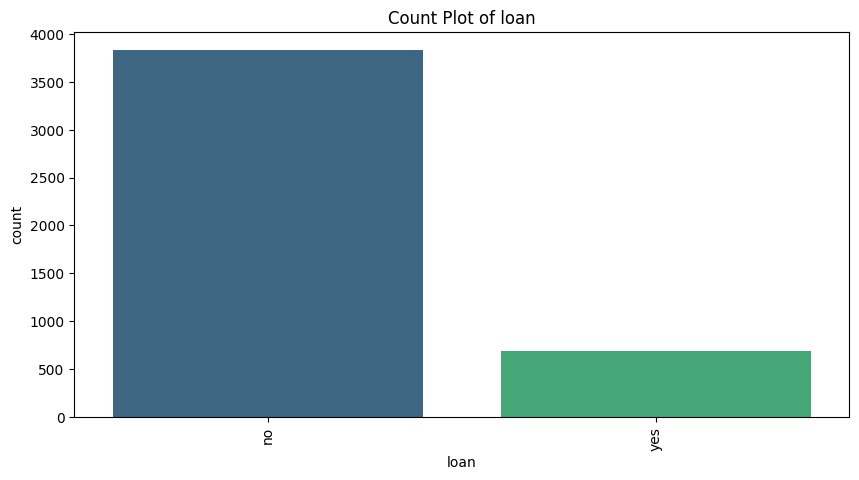

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_11307/3973840125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= feature, palette='viridis')


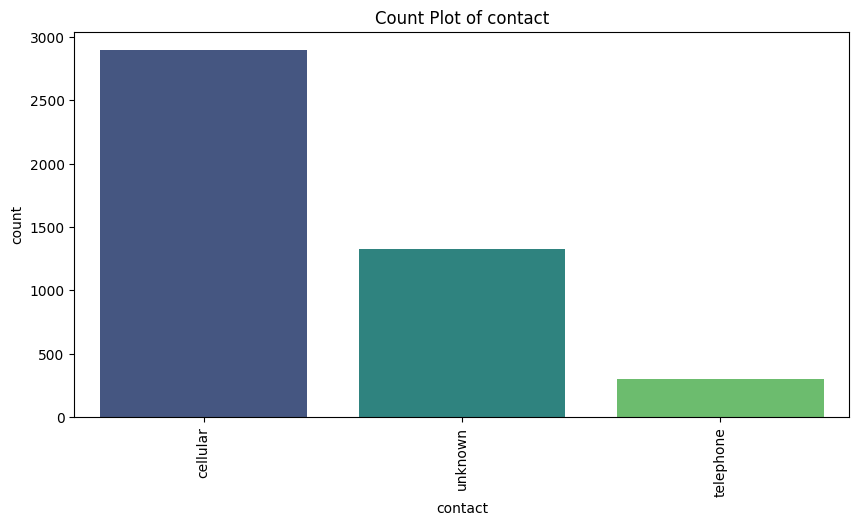

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_11307/3973840125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= feature, palette='viridis')


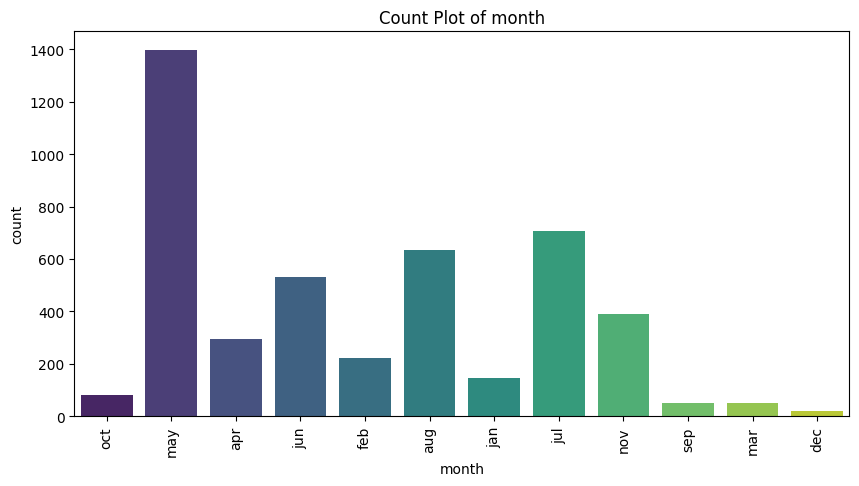

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_11307/3973840125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= feature, palette='viridis')


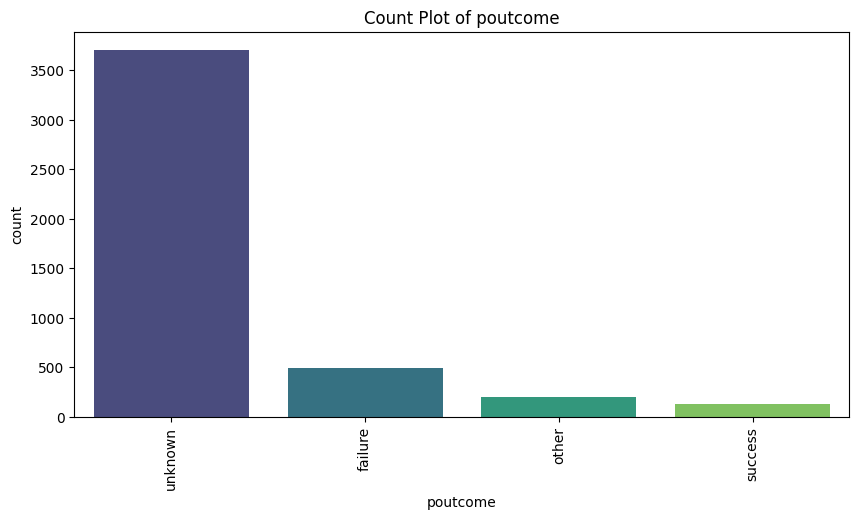

/var/folders/cf/5k4xmsh15jg3966nv9jy7dkr0000gn/T/ipykernel_11307/3973840125.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x= feature, palette='viridis')


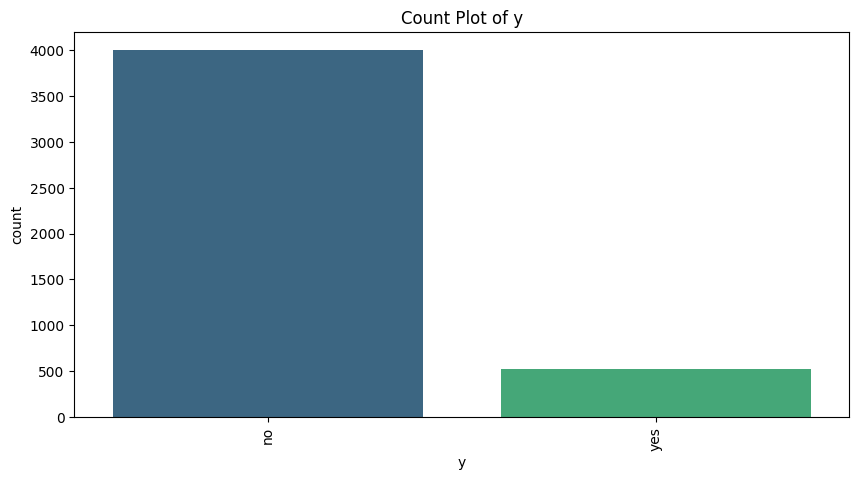

In [10]:
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x= feature, palette='viridis')
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=90)
    plt.show()

#### **2.4: Correlation Analysis**

#### Correlation Matrix

In [11]:
corr_matrix = df[numerical_features].corr()
corr_matrix

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.083820,-0.017853,-0.002367,-0.005148,-0.008894,-0.003511
balance,0.083820,1.000000,-0.008677,-0.015950,-0.009976,0.009437,0.026196
day,-0.017853,-0.008677,1.000000,-0.024629,0.160706,-0.094352,-0.059114
duration,-0.002367,-0.015950,-0.024629,1.000000,-0.068382,0.010380,0.018080
campaign,-0.005148,-0.009976,0.160706,-0.068382,1.000000,-0.093137,-0.067833
pdays,-0.008894,0.009437,-0.094352,0.010380,-0.093137,1.000000,0.577562
previous,-0.003511,0.026196,-0.059114,0.018080,-0.067833,0.577562,1.000000


#### Heatmap

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

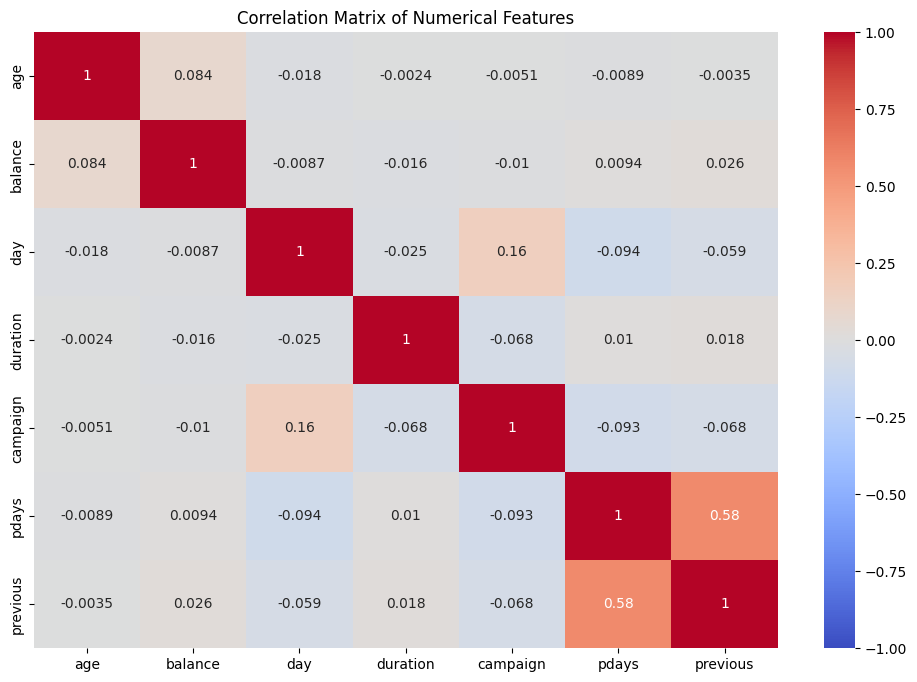

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')

#### Greatest correlation between previous and pdays!

#### **2.5: Understanding Skewness and Kurtosis**

In [13]:
for feature in numerical_features:
    skewness = df[feature].skew()
    kurtosis = df[feature].kurtosis()
    print(f"{feature} - Skewness: {skewness}, Kurtosis: {kurtosis}")


age - Skewness: 0.6995014533559305, Kurtosis: 0.3487754872611486
balance - Skewness: 6.596430546295735, Kurtosis: 88.39033211861796
day - Skewness: 0.09462690455175846, Kurtosis: -1.0395310625320089
duration - Skewness: 2.7724197169136455, Kurtosis: 12.530049737749446
campaign - Skewness: 4.74391446894159, Kurtosis: 37.168920102993624
pdays - Skewness: 2.71707136656418, Kurtosis: 7.957127901823425
previous - Skewness: 5.875258677896706, Kurtosis: 51.995211518308764


#### 3. **Logistic Regression Model** 

##### **3.1: Data Preprocessing and Splitting the Data**

In [14]:
categorical_features = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for feature in categorical_features:
    df[feature] = le.fit_transform(df[feature])

In [16]:
X = df.drop('y', axis=1)
y = df['y']

In [17]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### **3.2: Train the model and Make Predictions**

In [20]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [26]:
y_pred = model.predict(X_test)
df[y_pred] = model.predict(X_test)


In [29]:
comparison_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
comparison_df.head(20)

,True Values,Predicted Values
2398,0,0
800,0,0
2288,0,0
2344,0,0
3615,0,0
3548,0,0
1115,0,0
4053,0,0
838,0,0
4141,0,0


##### **3.2: Evaluating the Model**

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8894620486366986
Confusion Matrix:
 [[1175   30]
 [ 120   32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      1205
           1       0.52      0.21      0.30       152

    accuracy                           0.89      1357
   macro avg       0.71      0.59      0.62      1357
weighted avg       0.86      0.89      0.87      1357



Text(0.5, 1.0, 'Confusion Matrix')

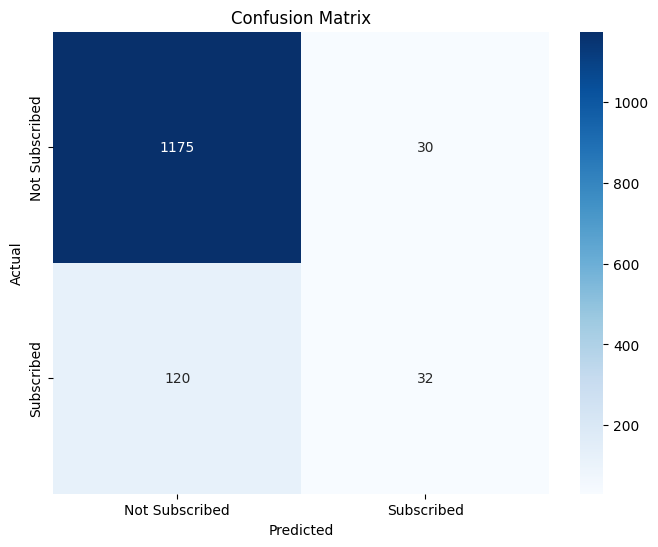

In [35]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Subscribed', 'Subscribed'], yticklabels=['Not Subscribed', 'Subscribed'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')


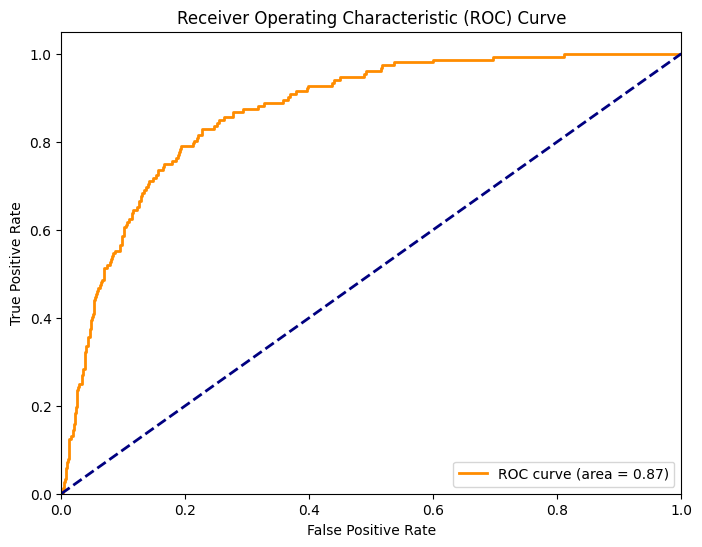

In [38]:
y_prob = model.predict_proba(X_test)[:, 1]  
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')


#### A perfect classifier has an ROC value of 1.0, but this logistic regression model which we trained has a value of 0.87 which is very good. This would be a good classifier and ROC values between 0.8 and 1 means that it is a good classifier. 